In [2]:
## Websites Used https://www.nfl.com/standings/league/2023/REG and https://www.spotrac.com/nfl/cap/_/year/2023/sort/cap_maximum_space
### The NFL.com website tracks the each teams record as well as some statistics such as points scored and allowed.
### The spotrac.com website tracks the financials for each team such as payroll.

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [2]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.maximize_window()

all_teams = []
all_cap_space = []
all_years = []

def spotrac_data(year):
    url = f"https://www.spotrac.com/nfl/cap/_/year/{year}/sort/cap_maximum_space"
    driver.get(url)

    # Wait until the first row's team name cell appears
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="table-wrapper"]//tbody/tr[1]/td[2]'))
    )

    team = []
    cap_space = []

    # Get all table rows
    rows = driver.find_elements(By.XPATH, '//*[@id="table-wrapper"]//tbody/tr')

    for row in rows:
        team_name = row.find_element(By.XPATH, './td[2]').text
        cap_amount = row.find_element(By.XPATH, './td[7]').text
        team.append(team_name)
        cap_space.append(cap_amount)

    return team, cap_space

# Loop over years and scrape data
for year in range(2023, 2010, -1):
    print(f"Scraping data for year {year}...")
    teams, cap_space = spotrac_data(year)
    all_teams.extend(teams)
    all_cap_space.extend(cap_space)
    all_years.extend([year] * len(teams))

# Create DataFrame
data = {
    'Year': all_years,
    'Team Abbr': all_teams,
    'Cap Space': all_cap_space
}

cap_df = pd.DataFrame(data)
cap_df.to_csv('Spotrac_Raw_Data.csv', index=False)

driver.quit()

# Show first few rows
print(cap_df.head())

Scraping data for year 2023...
Scraping data for year 2022...
Scraping data for year 2021...
Scraping data for year 2020...
Scraping data for year 2019...
Scraping data for year 2018...
Scraping data for year 2017...
Scraping data for year 2016...
Scraping data for year 2015...
Scraping data for year 2014...
Scraping data for year 2013...
Scraping data for year 2012...
Scraping data for year 2011...
   Year Team Abbr    Cap Space
0  2023        SF  $37,989,804
1  2023       CLE  $29,876,309
2  2023       WAS  $12,093,648
3  2023        LV  $11,529,499
4  2023       ARI  $11,175,765


In [3]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.maximize_window()

all_teams = []
all_wins = []
all_losses = []
all_ties = []
all_win_pcts = []
all_years = []

def nfl_data(year):
    url = f"https://www.nfl.com/standings/league/{year}/REG"
    driver.get(url)

    # Wait for table to appear
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="main-content"]//table/tbody/tr[1]/td[1]'))
    )

    teams = []
    wins = []
    losses = []
    ties = []
    win_pct = []

    # Get all rows in the standings table
    rows = driver.find_elements(By.XPATH, '//*[@id="main-content"]//table/tbody/tr')

    for row in rows:
        team_name = row.find_element(By.XPATH, './td[1]').text
        team_wins = row.find_element(By.XPATH, './td[2]').text
        team_losses = row.find_element(By.XPATH, './td[3]').text
        team_ties = row.find_element(By.XPATH, './td[4]').text
        team_win_pct = row.find_element(By.XPATH, './td[5]').text

        # Clean up text
        team_name = team_name.replace("\nx\nz", "").replace("\nx", "").replace("\n*", "").replace("\ny", "")

        teams.append(team_name)
        wins.append(team_wins)
        losses.append(team_losses)
        ties.append(team_ties)
        win_pct.append(team_win_pct)

    return teams, wins, losses, ties, win_pct

# Loop through years
for year in range(2023, 2010, -1):
    print(f"Scraping data for year {year}...")
    teams, wins, losses, ties, win_pct = nfl_data(year)
    all_teams.extend(teams)
    all_wins.extend(wins)
    all_losses.extend(losses)
    all_ties.extend(ties)
    all_win_pcts.extend(win_pct)
    all_years.extend([year] * len(teams))

# Create DataFrame
data = {
    'Year': all_years,
    'Team': all_teams,
    'Wins': all_wins,
    'Losses': all_losses,
    'Ties': all_ties,
    'PCT': all_win_pcts
}

nfl_df = pd.DataFrame(data)
nfl_df.to_csv('NFL_Raw_Data.csv', index=False)

driver.quit()

# Show first rows
print(nfl_df.head())

Scraping data for year 2023...
Scraping data for year 2022...
Scraping data for year 2021...
Scraping data for year 2020...
Scraping data for year 2019...
Scraping data for year 2018...
Scraping data for year 2017...
Scraping data for year 2016...
Scraping data for year 2015...
Scraping data for year 2014...
Scraping data for year 2013...
Scraping data for year 2012...
Scraping data for year 2011...
   Year                 Team Wins Losses Ties    PCT
0  2023     Baltimore Ravens   13      4    0  0.765
1  2023       Dallas Cowboys   12      5    0  0.706
2  2023        Detroit Lions   12      5    0  0.706
3  2023  San Francisco 49ers   12      5    0  0.706
4  2023        Buffalo Bills   11      6    0  0.647


In [6]:
# This gives the team names that have changed over this time period a common name
nfl_df['Team'] = nfl_df['Team'].replace({
    'Redskins': 'Commanders',
    'Football Team': 'Commanders',
    'Niners': '49ers'
})

print(nfl_df.head())

   Year                 Team Wins Losses Ties    PCT
0  2023     Baltimore Ravens   13      4    0  0.765
1  2023       Dallas Cowboys   12      5    0  0.706
2  2023        Detroit Lions   12      5    0  0.706
3  2023  San Francisco 49ers   12      5    0  0.706
4  2023        Buffalo Bills   11      6    0  0.647


In [14]:
# This maps the abbreviations from the Spotrac df to the team names of the NFL df
team_mapping = {
    'ARI': 'Arizona Cardinals',
    'ATL': 'Atlanta Falcons',
    'BAL': 'Baltimore Ravens',
    'BUF': 'Buffalo Bills',
    'CAR': 'Carolina Panthers',
    'CHI': 'Chicago Bears',
    'CIN': 'Cincinnati Bengals',
    'CLE': 'Cleveland Browns',
    'DAL': 'Dallas Cowboys',
    'DEN': 'Denver Broncos',
    'DET': 'Detroit Lions',
    'GB': 'Green Bay Packers',
    'HOU': 'Houston Texans',
    'IND': 'Indianapolis Colts',
    'JAX': 'Jacksonville Jaguars',
    'KC': 'Kansas City Chiefs',
    'LAC': 'Los Angeles Chargers',
    'LAR': 'Los Angeles Rams',
    'LV': 'Las Vegas Raiders',
    'MIA': 'Miami Dolphins',
    'MIN': 'Minnesota Vikings',
    'NE': 'New England Patriots',
    'NO': 'New Orleans Saints',
    'NYG': 'New York Giants',
    'NYJ': 'New York Jets',
    'PHI': 'Philadelphia Eagles',
    'PIT': 'Pittsburgh Steelers',
    'SEA': 'Seattle Seahawks',
    'SF': 'San Francisco 49ers',
    'TB': 'Tampa Bay Buccaneers',
    'TEN': 'Tennessee Titans',
    'WAS': 'Washington Commanders',
    'OAK': 'Las Vegas Raiders',
    'SD': 'Los Angeles Chargers',
    'STL': 'Los Angeles Rams',
}

cap_df['Team'] = cap_df['Team Abbr'].replace(team_mapping)

In [15]:
# This combines both data frames into one
merged_df = pd.merge(nfl_df, cap_df, on = ['Team' , 'Year'], how = 'left')
merged_df = merged_df.drop(columns = ['Team Abbr'])
merged_df
merged_df.to_csv('NFL_Cap_Data_Raw.csv', index = False)
print(merged_df.head())

   Year                 Team Wins Losses Ties    PCT    Cap Space
0  2023     Baltimore Ravens   13      4    0  0.765   $1,049,714
1  2023       Dallas Cowboys   12      5    0  0.706  $10,801,968
2  2023        Detroit Lions   12      5    0  0.706   $3,800,950
3  2023  San Francisco 49ers   12      5    0  0.706  $37,989,804
4  2023        Buffalo Bills   11      6    0  0.647    $-792,453


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Finding the correlation between 'Cap Space' and 'PCT'
merged_df = pd.read_csv('NFL_Cap_Data_Raw.csv')
merged_df['Cap Space'] = merged_df['Cap Space'].replace({r'\$': '', r',': ''}, regex=True)
merged_df['Cap Space'] = pd.to_numeric(merged_df['Cap Space'], errors='coerce')
correlation = merged_df['Cap Space'].corr(merged_df['PCT'])
print(f"Correlation between Cap Space and Win Percentage: {correlation}")

Correlation between Cap Space and Win Percentage: -0.20931842495188993


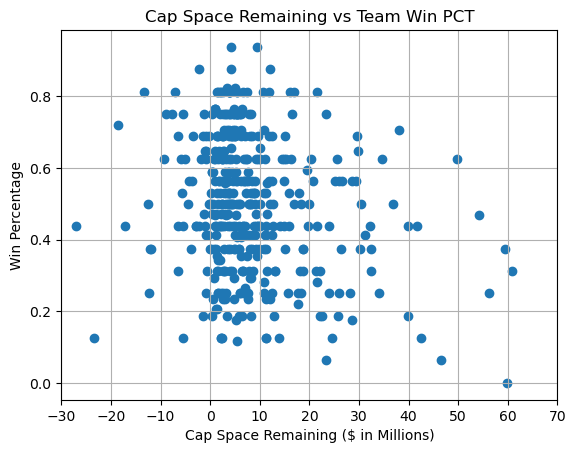

In [19]:
# Scatter plot showing each teams win percentage and their cap space remaining.
cap_vs_win = pd.read_csv('NFL_Cap_Data_Raw.csv')
cap_vs_win['Cap Space'] = cap_vs_win['Cap Space'].replace({r'\$': '', r',': '', r'\(': '-', r'\)': ''}, regex=True)
cap_vs_win['Cap Space'] = pd.to_numeric(cap_vs_win['Cap Space'], errors='coerce')
cap_vs_win['Cap Space'] = cap_vs_win['Cap Space'] / 1000000

plt.scatter(cap_vs_win['Cap Space'], cap_vs_win['PCT'])
plt.title('Cap Space Remaining vs Team Win PCT')
plt.xlabel('Cap Space Remaining ($ in Millions)')
plt.ylabel('Win Percentage')
plt.xlim(-20,60)
plt.xticks(range(-30,71,10))
plt.grid(True)
plt.show()

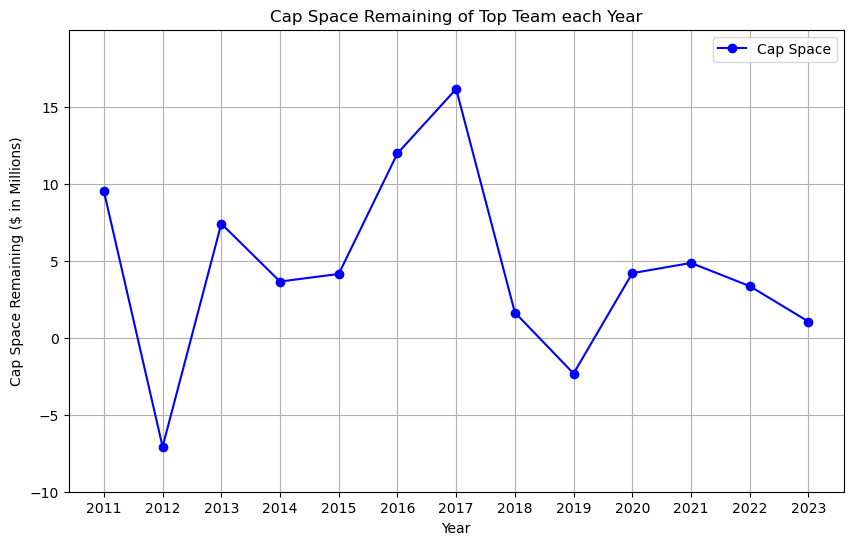

In [25]:
# Finding the top team each season and how much cap space they had remaining
top_team_spending = pd.read_csv('NFL_Cap_Data_Raw.csv')

top_teams_idx = top_team_spending.groupby('Year')['PCT'].idxmax()
top_teams = top_team_spending.loc[top_teams_idx]
top_teams['Cap Space'] = top_teams['Cap Space'].replace({r'\$': '', r',': '', r'\(': '-', r'\)': ''}, regex=True)
top_teams['Cap Space'] = pd.to_numeric(top_teams['Cap Space'], errors='coerce')
top_teams['Cap Space'] = top_teams['Cap Space'] / 1000000
top_teams
plt.figure(figsize=(10,6))
plt.plot(top_teams['Year'], top_teams['Cap Space'], marker = 'o', color = 'b', label = 'Cap Space')
plt.xlabel('Year')
plt.ylabel('Cap Space Remaining ($ in Millions)')
plt.title('Cap Space Remaining of Top Team each Year')
plt.xticks(top_teams['Year'])
plt.ylim(-10,20)
plt.yticks(range(-10,20,5))
plt.grid(True)
plt.legend()
plt.show()

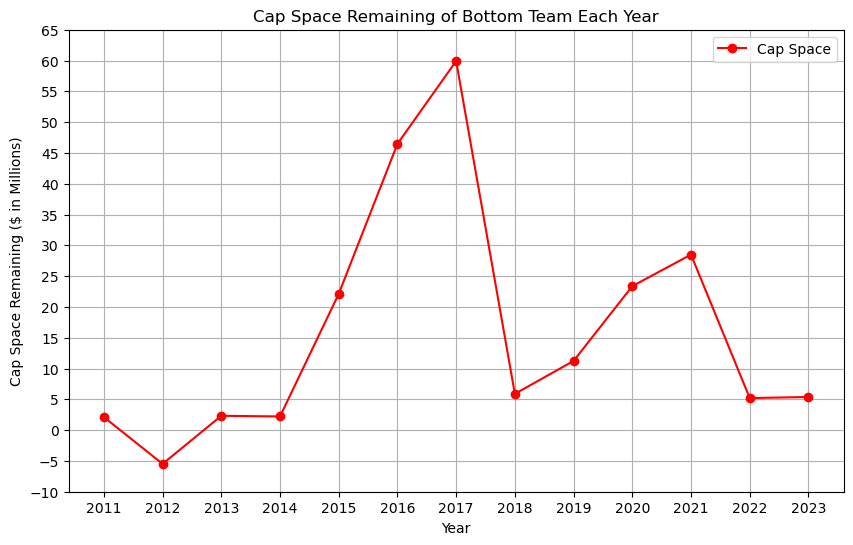

In [26]:
bottom_team_spending = pd.read_csv('NFL_Cap_Data_Raw.csv')

bottom_teams_idx = bottom_team_spending.groupby('Year')['PCT'].idxmin()
bottom_teams = bottom_team_spending.loc[bottom_teams_idx]
bottom_teams['Cap Space'] = bottom_teams['Cap Space'].replace({r'\$': '', r',': '', r'\(': '-', r'\)': ''}, regex=True)
bottom_teams['Cap Space'] = pd.to_numeric(bottom_teams['Cap Space'], errors='coerce')
bottom_teams['Cap Space'] = bottom_teams['Cap Space'] / 1000000
bottom_teams
plt.figure(figsize=(10,6))
plt.plot(bottom_teams['Year'], bottom_teams['Cap Space'], marker = 'o', color = 'r', label = 'Cap Space')
plt.xlabel('Year')
plt.ylabel('Cap Space Remaining ($ in Millions)')
plt.title('Cap Space Remaining of Bottom Team Each Year')
plt.xticks(bottom_teams['Year'])
plt.ylim(-10, 60)
plt.yticks(range(-10, 66, 5))
plt.grid(True)
plt.legend()
plt.show()

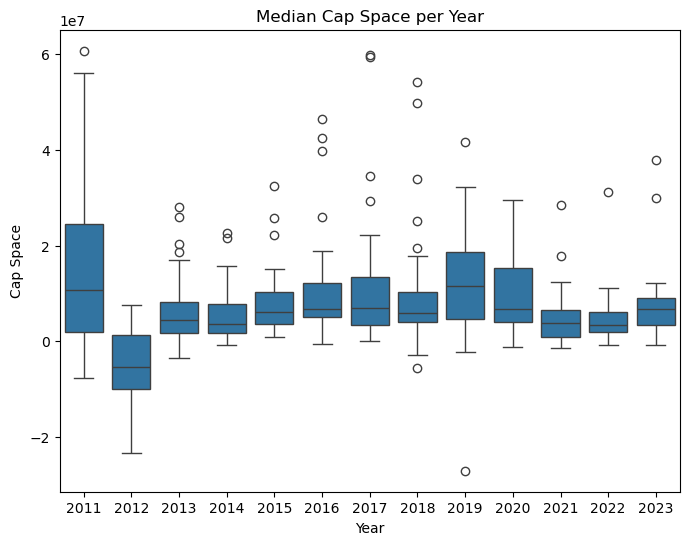

In [27]:
# Finding the median cap space for each season
import seaborn as sns
cap_data = pd.read_csv('NFL_Cap_Data_Raw.csv')

cap_data['Cap Space'] = cap_data['Cap Space'].replace({r'\$': '', r',': '', r'\(': '-', r'\)': ''}, regex=True)
cap_data['Cap Space'] = pd.to_numeric(cap_data['Cap Space'], errors='coerce')

median_cap_space = cap_data.groupby('Year')['Cap Space'].median()
median_cap_space
plt.figure(figsize=(8,6))
sns.boxplot(x='Year', y='Cap Space', data=cap_data)
plt.title('Median Cap Space per Year')
plt.xlabel('Year')
plt.ylabel('Cap Space')
plt.show()

In [28]:
# Finding the averages for each team
import numpy as np
avg_stats = pd.read_csv('NFL_Cap_Data_Raw.csv')
avg_stats['Cap Space'] = avg_stats['Cap Space'].replace({r'\$': '', r',': '', r'\(': '-', r'\)': ''}, regex=True)
avg_stats['Cap Space'] = pd.to_numeric(avg_stats['Cap Space'], errors='coerce')
avg_stats['Cap Space'] = avg_stats['Cap Space'] / 1000000
avg_pct = avg_stats.groupby('Team')[['Cap Space', 'PCT']].mean().reset_index()
avg_pct.columns = ['Team', 'Average Cap Space (M)', 'Average Win PCT']

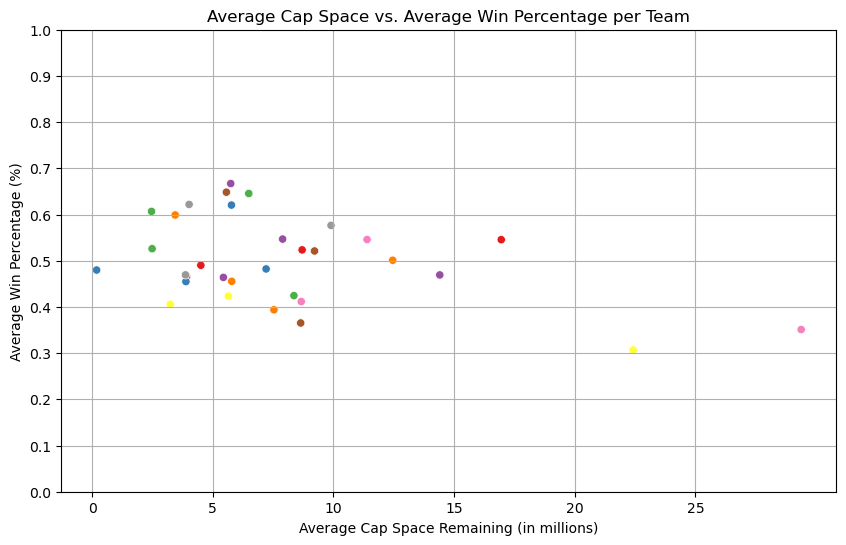

In [30]:
# Scatter plot of each teams win percentage and cap space remaining averages
avg_pct['Average Cap Space (M)'] = avg_pct['Average Cap Space (M)'].replace({r'\$': '', r',': '', r'\(': '-', r'\)': ''}, regex=True)
avg_pct['Average Cap Space (M)'] = pd.to_numeric(avg_pct['Average Cap Space (M)'], errors='coerce')
avg_pct['Average Win PCT'] = avg_pct['Average Win PCT'].replace({r'%': '', r',': ''}, regex=True)
avg_pct['Average Win PCT'] = pd.to_numeric(avg_pct['Average Win PCT'], errors='coerce')
team_avg = avg_pct.groupby('Team').agg({'Average Cap Space (M)': 'mean', 'Average Win PCT': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=team_avg, x='Average Cap Space (M)', y='Average Win PCT', hue='Team', palette='Set1', legend=False)

plt.title('Average Cap Space vs. Average Win Percentage per Team')
plt.xlabel('Average Cap Space Remaining (in millions)')
plt.ylabel('Average Win Percentage (%)')
plt.xticks(ticks=range(0, 30, 5))
plt.ylim(0, 1.00)
plt.yticks(np.arange(0, 1.1, .10))
plt.grid(True)
plt.show()
